In [1]:
%load_ext autoreload
%autoreload 2

from pydrake.geometry import StartMeshcat

from iiwa_batter.sandbox.hydroelastic_tuning import run_hydroelastic_tuning
from iiwa_batter.assets.make_assets import write_assets

In [2]:
meshcat = StartMeshcat()

INFO:drake:Meshcat listening for connections at http://localhost:7000


In [161]:
import numpy as np

bat_modulus = 1.2e12
ball_modulus = 6e9
mu_dynamic = 0.5
rigid_bat = False
dt = 1e-4
write_assets(bat_modulus, ball_modulus, 1e-3, 1e-3, mu_dynamic, 0.02, rigid_bat)

velocities = np.linspace(20, 60, 9)

velocity_results = {}
for velocity in velocities:
    cor, ball_x_positions, ball_x_velocities, times = run_hydroelastic_tuning(meshcat, [1, 0, 0], -1*velocity, dt=dt, record_time=0.1, debug_plot=False)
    velocity_results[velocity] = {
        "cor": cor,
        "ball_x_positions": ball_x_positions,
        "ball_x_velocities": ball_x_velocities,
        "times": times,
    }


Minimum x position: 0.06799999999999917
X position error: 0.0
Minimum x position: 0.06750000000001027
X position error: -0.0004999999999888982
Minimum x position: 0.06699999999999917
X position error: -0.0010000000000000009
Minimum x position: 0.06800686364808084
X position error: 6.863648081667506e-06
Minimum x position: 0.06782345136835329
X position error: -0.00017654863164588697
Minimum x position: 0.067779120737986
X position error: -0.00022087926201316832
Minimum x position: 0.06499999999999917
X position error: -0.0030000000000000027
Minimum x position: 0.06500000000000417
X position error: -0.0029999999999950067
Minimum x position: 0.06399999999999917
X position error: -0.0040000000000000036


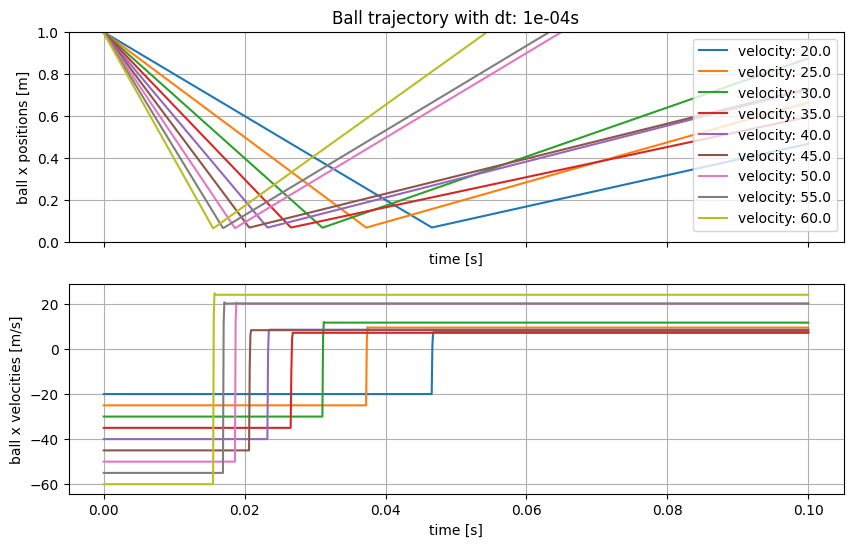

In [162]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

for velocity, result in velocity_results.items():
    ball_x_positions = result["ball_x_positions"]
    ball_x_velocities = result["ball_x_velocities"]
    times = result["times"]
    axes[0].plot(times, ball_x_positions, label=f"velocity: {velocity}")
    axes[1].plot(times, ball_x_velocities, label=f"velocity: {velocity}")

axes[0].set_ylabel("ball x positions [m]")
axes[0].set_xlabel("time [s]")
axes[0].grid(True)
axes[0].set_ylim([0, 1])
axes[1].set_ylabel("ball x velocities [m/s]")
axes[1].set_xlabel("time [s]")
axes[1].grid(True)

axes[0].legend()

axes[0].set_title(f"Ball trajectory with dt: {dt:.0e}s")

fig.savefig(f"ball_trajectory_hydroelastic_tuning_dt_{dt:.0e}.png")
